<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 02: Basic Statistics </h3>

# What is Statistics? 

* Statistics is the science concerned with developing and studying methods for collecting, analyzing, interpreting and presenting empirical data.
* Two fundamental ideas in the field of statistics are uncertainty and variation. Probability is a mathematical language used to discuss uncertain events. 
* Any measurement or data collection effort is subject to a number of sources of variation (i.e. if we repeat the same measurement, and re-run tests, then the answer would likely change).

# Why do we need statistics? 

* Every year, the U.S. Census Bureau contacts over 3.5 million households across the country to participate in the American Community Survey. How can we assess the data? 
    * Look at each survey individually... (cumbersome) 
    * **Summarize and describe the data!** 

# Different Types of Data 

* Continuous (interval, float, numeric) - *wind speed, time duration* 
* Discrete (integer, count) - *count of tornadoes per state* 
* Categorical (factors, nominal) - *state name* 
* Binary (logical, boolean) - *true / false* 
* Ordinal (explicit ordering) - *restaurant rating* 

# Why Use Different Data Types 

* Optimize storage and computations 
* Optimize predictions (stats procedures)

# Rectangular Data

* Spreadsheet / database table. 
* Data frame 
* Feature (columns, independent variables) 
* Outcome (dependent variable) 
* Records (rows in a dataframe) 

In [1]:
import configparser

# mumbo-jumbo to hide paths
config = configparser.ConfigParser()
config.read('config.ini')
data_path = config.get('my-config', 'data_path')

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import cenpy
import contextily
from mpl_toolkits.axes_grid1 import make_axes_locatable

ModuleNotFoundError: No module named 'missingno'

In [3]:
df = pd.read_csv(data_path + 'metro-bike-share-trip-data.csv')
print(df.shape) 
df.head()

(132427, 22)


,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Trip ID', 'Duration', 'Start Time', 'End Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude',
       'Ending Station ID', 'Ending Station Latitude',
       'Ending Station Longitude', 'Bike ID', 'Plan Duration',
       'Trip Route Category', 'Passholder Type', 'Starting Lat-Long',
       'Ending Lat-Long', 'Neighborhood Councils (Certified)',
       'Council Districts', 'Zip Codes', 'LA Specific Plans',
       'Precinct Boundaries', 'Census Tracts'],
      dtype='object')

In [5]:
df.dtypes

Trip ID                                int64
Duration                               int64
Start Time                            object
End Time                              object
Starting Station ID                  float64
Starting Station Latitude            float64
Starting Station Longitude           float64
Ending Station ID                    float64
Ending Station Latitude              float64
Ending Station Longitude             float64
Bike ID                              float64
Plan Duration                        float64
Trip Route Category                   object
Passholder Type                       object
Starting Lat-Long                     object
Ending Lat-Long                       object
Neighborhood Councils (Certified)    float64
Council Districts                    float64
Zip Codes                            float64
LA Specific Plans                    float64
Precinct Boundaries                  float64
Census Tracts                        float64
dtype: obj

# What is *int* and what is *64*? 

> Int64 is an immutable value type that represents signed integers with values that range from negative 9,223,372,036,854,775,808 through positive 9,223,372,036,854,775,807 (from Microsoft) 

# Other data formats 

* Graphs 
* Spatial data 
* Spatio-temporal data

# Summarizing and Describing the Data

## Histograms 101

### Can we describe duration of 132k bike trips? --> Easy! 

In [6]:
df.Duration.value_counts()

360      9571
420      9385
300      8983
480      8873
540      7693
         ... 
42060       1
54840       1
80820       1
81540       1
66180       1
Name: Duration, Length: 932, dtype: int64

In [7]:
df.Duration.value_counts()[:10]

360    9571
420    9385
300    8983
480    8873
540    7693
240    7314
600    7023
660    6164
720    5465
780    4873
Name: Duration, dtype: int64

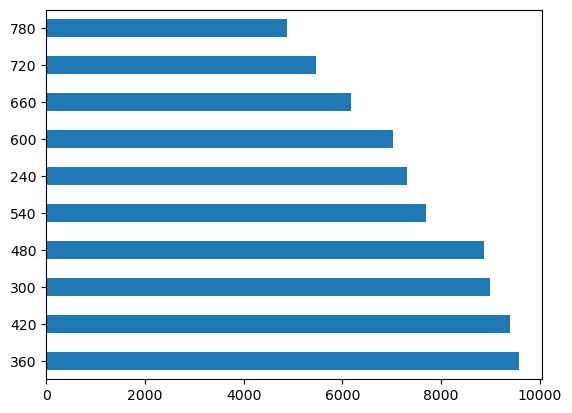

In [8]:
df.Duration.value_counts()[:10].plot(kind='barh');

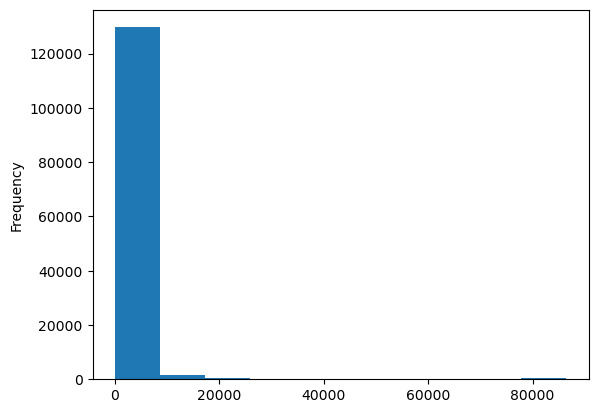

In [9]:
df.Duration.plot(kind='hist'); # regular histogram

<h2 style="color:blue"> <center> When we have wide range of values it is best to use log-scale to see variability </h2>

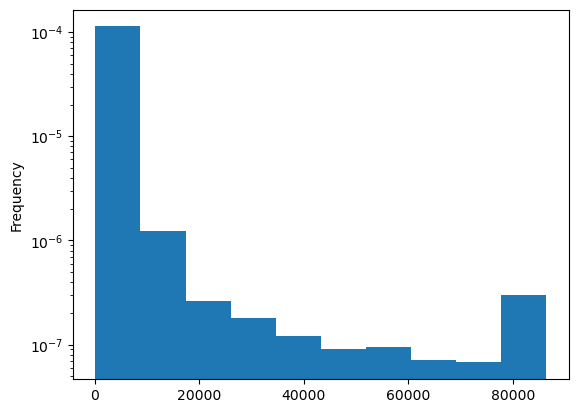

In [10]:
df.Duration.plot(kind='hist', density=True, logy=True); # log-scale

# How about some other data? 

## Census API via Cenpy

In [11]:
acs = cenpy.products.ACS()

In [12]:
acs.tables

,description,columns
table_name,,
B01001,SEX BY AGE,"[B01001_001E, B01001_002E, B01001_003E, B01001..."
B01002,MEDIAN AGE BY SEX,"[B01002_001E, B01002_002E, B01002_003E]"
B01003,TOTAL POPULATION,[B01003_001E]
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
...,...,...
C27014,PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE,"[C27014_001E, C27014_002E, C27014_003E, C27014..."
C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...,"[C27016_001E, C27016_002E, C27016_003E, C27016..."
C27017,PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO...,"[C27017_001E, C27017_002E, C27017_003E, C27017..."


In [13]:
acs.filter_tables('RACE', by='description')

,description,columns
table_name,,
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
B02009,BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...,[B02009_001E]
B02010,AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN ...,[B02010_001E]
B02011,ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02011_001E]
B02012,NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALO...,[B02012_001E]
B02013,SOME OTHER RACE ALONE OR IN COMBINATION WITH O...,[B02013_001E]
B03002,HISPANIC OR LATINO ORIGIN BY RACE,"[B03002_001E, B03002_002E, B03002_003E, B03002..."
B25006,RACE OF HOUSEHOLDER,"[B25006_001E, B25006_002E, B25006_003E, B25006..."


In [14]:
acs.filter_tables('HISPANIC', by='description')

,description,columns
table_name,,
B03001,HISPANIC OR LATINO ORIGIN BY SPECIFIC ORIGIN,"[B03001_001E, B03001_002E, B03001_003E, B03001..."
B03002,HISPANIC OR LATINO ORIGIN BY RACE,"[B03002_001E, B03002_002E, B03002_003E, B03002..."
B03003,HISPANIC OR LATINO ORIGIN,"[B03003_001E, B03003_002E, B03003_003E]"
B16006,LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK EN...,"[B16006_001E, B16006_002E, B16006_003E, B16006..."
B98013,TOTAL POPULATION COVERAGE RATE BY WEIGHTING RA...,"[B98013_001E, B98013_002E, B98013_003E, B98013..."
B99031,ALLOCATION OF HISPANIC OR LATINO ORIGIN,"[B99031_001E, B99031_002E, B99031_003E]"


In [15]:
acs.filter_variables('B03002').head()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B03002_021E,Estimate!!Total:!!Hispanic or Latino:!!Two or ...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_021EA,B03002_021M,B03002_021MA",NaN
B03002_020E,Estimate!!Total:!!Hispanic or Latino:!!Two or ...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_020EA,B03002_020M,B03002_020MA",NaN
B03002_001E,Estimate!!Total:,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_001EA,B03002_001M,B03002_001MA",NaN
B03002_005E,Estimate!!Total:!!Not Hispanic or Latino:!!Ame...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_005EA,B03002_005M,B03002_005MA",NaN
B03002_004E,Estimate!!Total:!!Not Hispanic or Latino:!!Bla...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_004EA,B03002_004M,B03002_004MA",NaN


In [16]:
hispanic = ['B03002_001', # full population 
            'B03002_002', # nonhispanic
            'B03002_012' # hispanic 
           ]

In [17]:
sb = acs.from_place('Santa Barbara, CA', variables=hispanic)

Matched: Santa Barbara, CA to Santa Barbara city within layer Incorporated Places


C:\Users\barguzin\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\barguzin\AppData\Local\Temp\ipykernel_24136\3008450086.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sb = acs.from_place('Santa Barbara, CA', variables=hispanic)


In [18]:
sb.head()

,GEOID,geometry,B03002_001E,B03002_002E,B03002_012E,state,county,tract
0,06083001101,"POLYGON ((-13328048.750 4085760.950, -13327914...",4973.0,2259.0,2714.0,06,083,001101
1,06083000301,"POLYGON ((-13327239.350 4086026.000, -13327215...",2604.0,1848.0,756.0,06,083,000301
2,06083001203,"POLYGON ((-13327373.260 4082932.050, -13327364...",3008.0,2336.0,672.0,06,083,001203
3,06083000600,"POLYGON ((-13325759.470 4088113.670, -13325694...",5555.0,4782.0,773.0,06,083,000600
4,06083001208,"POLYGON ((-13328035.280 4082066.990, -13328002...",4331.0,3256.0,1075.0,06,083,001208


In [19]:
sb_basemap, sb_extent = contextily.bounds2img(*sb.total_bounds, zoom=12, 
                                                        source=contextily.providers.Stamen.TonerLite)

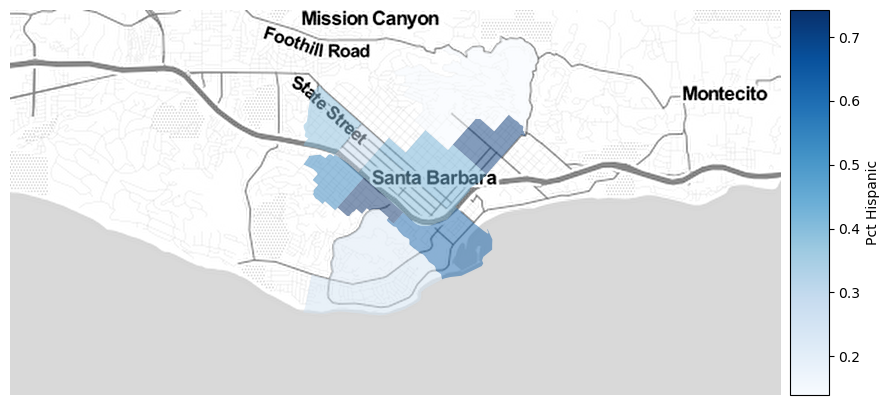

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
ax.imshow(sb_basemap, extent=sb_extent, interpolation='sinc')
sb['pct_hispanic'] = sb.eval('B03002_012E / B03002_001E')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sb.plot('pct_hispanic', cmap='Blues', ax = ax, alpha=.5, legend=True, cax=cax, 
       legend_kwds={'label': "Pct Hispanic"})
                    #, 'orientation': "horizontal"})
_ = ax.axis("off")

(11, 9)


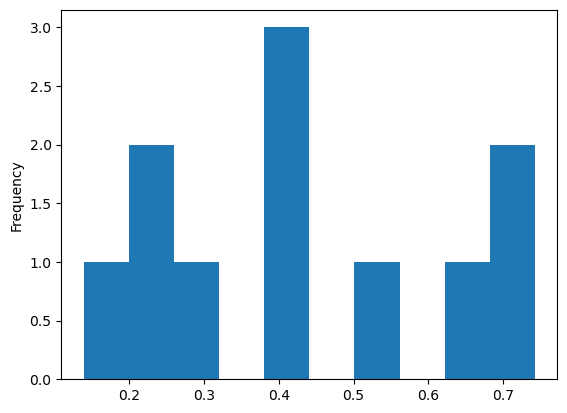

In [21]:
print(sb.shape)
sb.pct_hispanic.plot(kind='hist');

In [22]:
lv = acs.from_place('Las Vegas, NV', variables=hispanic)

Matched: Las Vegas, NV to Las Vegas city within layer Incorporated Places


C:\Users\barguzin\AppData\Local\Temp\ipykernel_24136\2359290152.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  lv = acs.from_place('Las Vegas, NV', variables=hispanic)


In [23]:
sa = acs.from_place('Sacramento, CA', variables=hispanic)

Matched: Sacramento, CA to Sacramento city within layer Incorporated Places


C:\Users\barguzin\AppData\Local\Temp\ipykernel_24136\3812244622.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  sa = acs.from_place('Sacramento, CA', variables=hispanic)


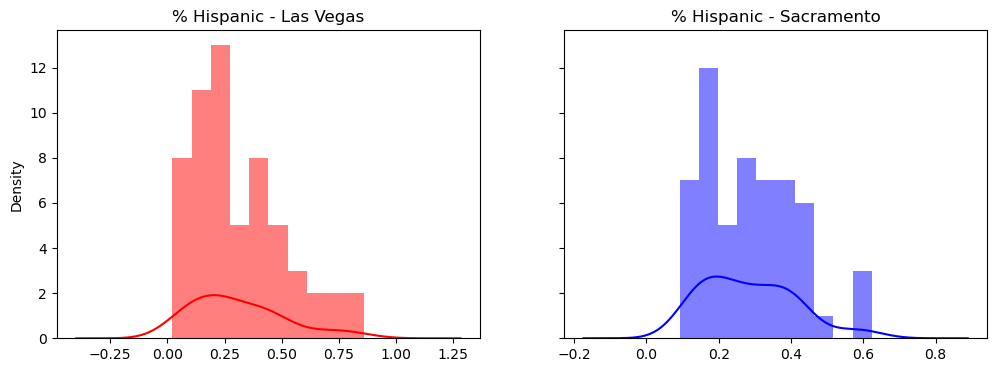

In [24]:
lv['pct_hispanic'] = lv.eval('B03002_012E / B03002_001E')
sa['pct_hispanic'] = sa.eval('B03002_012E / B03002_001E')

fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,4));
lv.pct_hispanic.plot(kind='hist',ax=ax[0], alpha=.5, color='red');
lv.pct_hispanic.plot(kind='kde',ax=ax[0], alpha=1, color='red');
ax[0].set_title('% Hispanic - Las Vegas');
sa.pct_hispanic.plot(kind='hist',ax=ax[1], alpha=.5, color='blue');
sa.pct_hispanic.plot(kind='kde',ax=ax[1], alpha=1, color='blue');
ax[1].set_title('% Hispanic - Sacramento');

# Measures of center and spread 

* Center == Location 
* Spread == Variation

# Estimates of Location 

* Mean/Average - The sum of all values divided by the number of values.
* Weighted Mean - The sum of all values times a weight divided by the sum of the weights.
* Median - The value such that one-half of the data lies above and below.
* Trimmed/Truncated mean - The average of all values after dropping a fixed number of extreme values.

# Mean 

$$
\text{Mean} = \bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}
$$

where $n$ is the size of the sample. 

In [25]:
x = [1,11,3,12,5]
mean = np.sum(x)/5
print(mean)

6.4


# Median 

* Mean is very sensitive to outliers (think about income and Bill Gates) 
* Median is a middle of a sorted list of data (more robust to outliers) 
* Trimmed mean is also robust to outliers (trip top 10% of high-income households) 

In [26]:
print(np.median(x))

5.0


# Estimates of Variability

* Deviation (errors, residuals) - The difference between the observed values and the estimate of location.
* Variance - The sum of squared deviations from the mean divided by n – 1 where n is the number of data values.
* Standard deviation - The squared root of variance 
* Mean Absolute Deviation - The mean of the absolute value of the deviations from the mean.
* Median <...> 

* Range - The difference between the largest and the smallest value in a data set.
* Order statistics (ranks) - Metrics based on the data values sorted from smallest to biggest.
* Percentile - The value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.
* IQR - The difference between the 75th percentile and the 25th percentile.

$$
\text{Variance} = s^2 = \frac{\sum(x - \bar{x})^2}{n-1}
$$

$$
\text{Standard Deviation} = s = \sqrt{\text{Variance}}
$$

> the Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100 – P)
percent of the values take on this value or more. For example, to find the 80th percentile, sort the data. Then, starting with the smallest value, proceed 80 percent of the way to the largest value. Note that the median is the same thing as the 50th
percentile. (Practical Statistics for Data Scientists, p. 41) 

# Locations and Variability May Vary 

In [27]:
mu, sigma = 0, 1 # mean and standard deviation
mu2, sigma2 = 1, 2

s = np.random.normal(mu, sigma, 1000)
s2 = np.random.normal(mu2, sigma2, 1000)

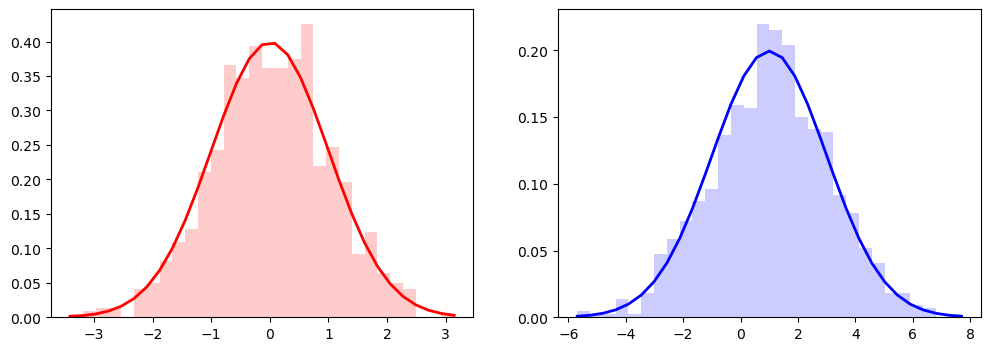

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
count, bins, ignored = ax[0].hist(s, 30, density=True, color='r', alpha=.2)
count2, bins2, ignored2 = ax[1].hist(s2, 30, density=True, color='b', alpha=.2)
ax[0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r');
ax[1].plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='b');

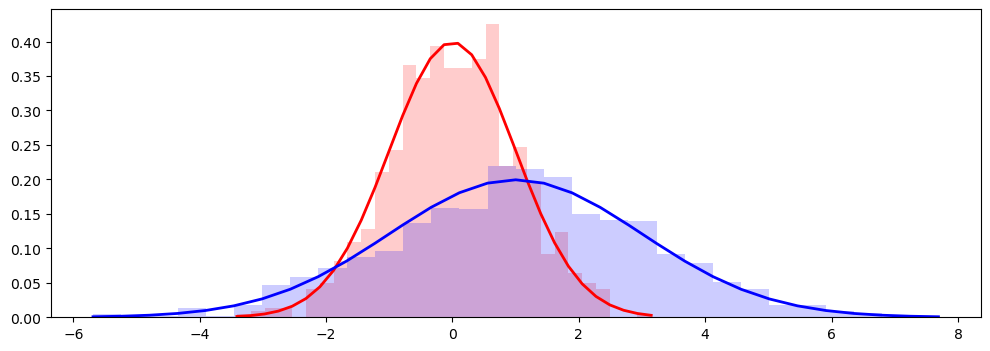

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
count, bins, ignored = ax.hist(s, 30, density=True, color='r', alpha=.2)
count2, bins2, ignored2 = ax.hist(s2, 30, density=True, color='b', alpha=.2)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
ax.plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ),
         linewidth=2, color='b')

# Skewness and Kurtosis

* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
* Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers.

<img src="https://www.researchgate.net/publication/340417580/figure/fig2/AS:876314567380995@1585941082906/Skewness-and-kurtosis.jpg" width="500px">

# Many different Types of Distribution

* Normal 
* Poisson 
* Gamma 
* Beta
* Uniform
* Chi-Square
* many more ... 

# Normal Distribution

* We already established measures of location ($\mu$) and variability ($\sigma$). 
* If we parametrize the distribution with two variables, such that it's density: 

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg">

# Normal Distribution

* 68.2% of observations fall within one standard deviation from the mean
* 95.4% (+27.2%) of observations fall within two standard deviations from the mean   
* 99.6% (+4.2%) of observations fall within three standard deviations from the mean
* Unimodal! 

# Exercise: calculating SD

> Input: [1,9,7,4,2,3]

1. Calculate mean
2. Calculate deviation from each point to the mean and square it 
3. Calculate variance (sum deviations over sample size)
4. Take square root of variance 

In [35]:
np.std([1,9,7,4,2,3])

2.8087165910587863

# Examples of Normal Distribution

* Height 
* Weight 
* Dice outcomes 
* IQ
* Shoe size 
* many more ... 

# Central Limit Theory 

* One reason why normal (Gaussian) distribution is so popular 
* Imagine we have a sample of size 1000 (let's assume that it's height in cm) 
* If we randomly draw samples of size 10 with replacement and take the mean of those samples, the distribution of means will also have a normal distribution. 
* This also works for sampling from non-normal distributions

In [43]:
wh = pd.read_csv('weight-height.xls')
print(wh.shape) 
wh.head()

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


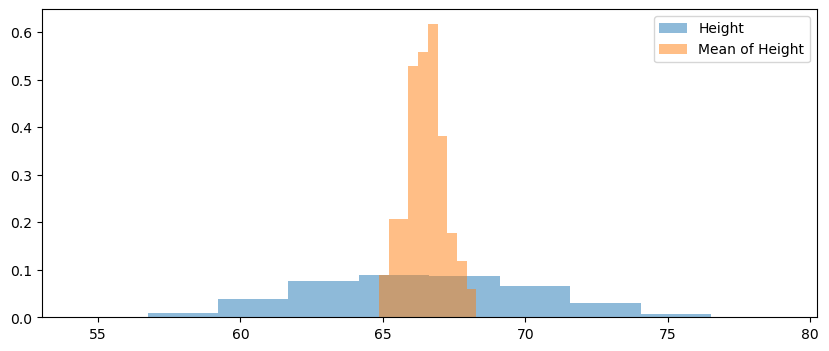

In [70]:
i = 100
samples = []

while i>0:
    x = np.random.choice(wh.Height, 35)
    samples.append(np.mean(x))
    i = i - 1

fig, ax = plt.subplots(figsize=(10,4))
ax.hist(wh.Height, density=True, alpha=.5, label='Height')
ax.hist(samples, density=True, alpha=.5, label='Mean of Height');
ax.legend();

# Questions? 

## For reviewing 

* Think Stats (Chapter 2) + Practical Statistics for Data Scientists (Chapter 1) 